# Plotting Notebook

Hi! Welcome :) This code was created by Marilena and refreshed and documented by Annabelle.
The goal of this script is to create plot ToF, sigma ToF, counts, signal to noise, and ToF effect for on and off resonant scans.
Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define tof resonance

In [181]:
def tof_res(df): 
    
    ToF = []
    counts = []
    x = []
    sigma = []
    
    for i in range(0, max(df['x_step_idx'])+1):
        
        df_i = df.loc[df['x_step_idx']==i]
        
        ToF.append(np.average(df_i['tof']))
        sigma.append(np.std(df_i['tof'])) #standard deviation of ToF
        x.append(i)
        counts.append(len(df_i['tof'])) 
        
    return ToF, sigma, x, counts

In [182]:
df = pd.read_csv("run45346.csv") 

df = df.loc[(df['tof']>=40) & (df['tof']<=120)] #tof cut on dataframe 

df_off_res = df.loc[df['y_step_idx']==0] #off resonance condition
df_on_res = df.loc[df['y_step_idx']==1] #on resonance condition

ToF_off_res, sigma_off_res, x_off_res, counts_off_res = tof_res(df_off_res)
ToF_on_res, sigma_on_res, x_on_res, counts_on_res = tof_res(df_on_res)

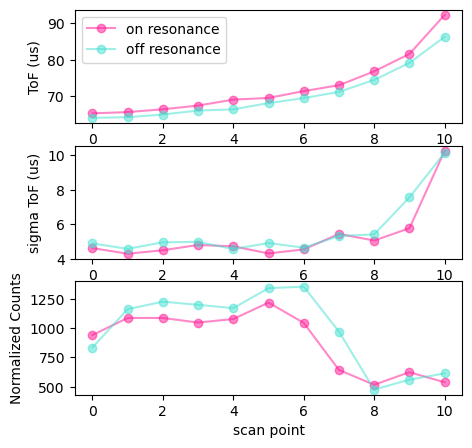

In [183]:
fig, axs = plt.subplots(3, figsize = [5, 5])

axs[0].plot(x_on_res, ToF_on_res, marker = 'o', color = 'deeppink', label = 'on resonance', alpha =0.5)
axs[0].plot(x_off_res, ToF_off_res, marker = 'o', color = 'turquoise', label = 'off resonance', alpha =0.5)
axs[0].set_ylabel('ToF (us)')
axs[0].legend()

axs[1].plot(x_on_res, sigma_on_res, marker = 'o', color = 'deeppink', alpha =0.5)
axs[1].plot(x_off_res, sigma_off_res, marker = 'o', color = 'turquoise', alpha =0.5)
axs[1].set_ylabel('sigma ToF (us)')

axs[2].plot(x_on_res, counts_on_res, marker = 'o', color='deeppink', alpha =0.5)
axs[2].plot(x_off_res, counts_off_res, marker = 'o', color='turquoise', alpha =0.5)
axs[2].set_ylabel('Normalized Counts')
axs[2].set_xlabel('scan point')

plt.savefig('Run45346.png', dpi = 200)

#### create functions for tof effect and signal to noise
##### tof effect = (tof on resonance - tof off resonance) / tof off resonance
##### signal to noise = (tof on resonance - tof off resonance) / sigma tof

In [184]:
tof_effect = [((xi - yi) / yi)*100 for xi, yi in zip(ToF_on_res, ToF_off_res)]

signal_to_noise = [((xi - yi) / sigmai) for xi, yi, sigmai in zip(ToF_on_res, ToF_off_res, sigma)]

#signal_to_noise = [np.array(ToF22)-np.array(ToF)]/np.array(sigma)

#### create plots of signal to noise and tof effect

Text(0.5, 0, 'scan point')

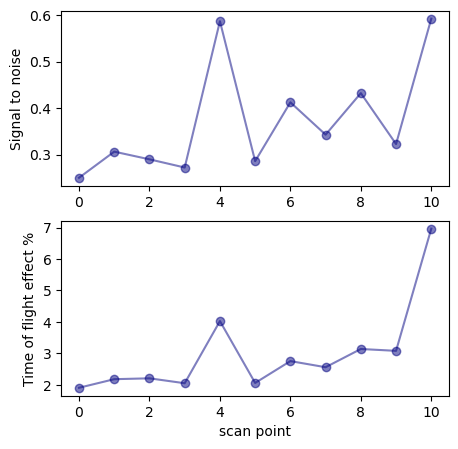

In [185]:
fig, axs = plt.subplots(2, figsize = [5,5])

axs[0].plot(x, signal_to_noise, marker = 'o', color='navy',alpha = 0.5)
axs[0].set_ylabel('Signal to noise')

axs[1].plot(x, tof_effect, marker = 'o', color='navy', alpha = 0.5)
axs[1].set_ylabel('Time of flight effect %')
axs[1].set_xlabel('scan point')